In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
df = pd.read_csv("dataset_fd_Sp_no-Mos.csv")

In [278]:
df_region_metric = pd.read_csv("merged_with_ria19-21.csv", index_col=0)

In [279]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,infections,deaths,healed,tests,Rt,level,yandex_continuous,yandex_level,pass,federal_district
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО


In [280]:
df_region_metric = df_region_metric.set_index("region")

In [281]:
df = pd.merge(df, df_region_metric.drop(["population"], axis=1), left_on="region", right_index=True)

In [399]:
df_region_metric

,sum_infections,population,sum_healed,sum_deathed,sum_unemployed,procent_healed,procent_infected,procent_death,procent_unemployed,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
region,,,,,,,,,,,,,,,,,,,
Адыгея,5828.0,463088.0,4557.0,49.0,598.597528,0.781915,0.012585,0.000106,0.001293,53.155182,1.896389,25.023275,3.822605,34.959291,26.8420,54.132260,1.836252,64.281350,1.948185
Алтай,7296.0,220181.0,6207.0,24.0,526.733598,0.850740,0.033136,0.000109,0.002392,43.871593,2.178380,36.256563,4.301187,9.430103,26.5495,46.457233,2.267008,53.269006,2.381802
Амурская,7313.0,790044.0,6864.0,65.0,835.681412,0.938602,0.009256,0.000082,0.001058,128.246053,4.061075,38.056268,5.810821,44.579305,35.8990,136.036727,4.147556,161.811917,4.304167
Архангельская,21299.0,1092424.0,13985.0,262.0,717.824677,0.656604,0.019497,0.000240,0.000657,160.991995,4.798038,30.937707,7.329229,49.566421,33.9440,165.969440,4.990174,191.145528,5.261514
Астраханская,9527.0,1005782.0,7323.0,173.0,1556.432574,0.768657,0.009472,0.000172,0.001547,88.434173,3.688483,24.910160,8.758001,34.508841,32.9120,92.234699,3.712293,103.549086,3.985838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хакасия,7700.0,534262.0,6276.0,83.0,540.352906,0.815065,0.014412,0.000155,0.001011,78.938092,3.663943,36.709842,9.724979,30.409276,20.0430,84.013087,3.704567,98.685051,3.929953
Челябинская,18836.0,3466369.0,14198.0,186.0,3244.037665,0.753769,0.005434,0.000054,0.000936,129.083971,5.236092,29.293511,10.798281,48.190734,51.9970,134.758013,5.352160,153.382266,5.526691
Чечня,3408.0,1478726.0,1948.0,46.0,6871.725879,0.571596,0.002305,0.000031,0.004647,8.542497,0.363339,22.560315,3.101398,10.816720,27.8550,9.429063,0.389558,13.820501,0.543782


In [398]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075


### Гипотеза
Количество заявок на пособие по безработице взаимосвязано с эпидемиологический обстановкой в регионе в период пандемии COVID19

In [282]:
df.head()

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185


## проверим наличие зависимостей на уровне регион-неделя

In [283]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index()

In [284]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["infections"] = agg_df["infections"] / agg_df["population"]
agg_df["unemployed"] = agg_df["unemployed"] / agg_df["population"]

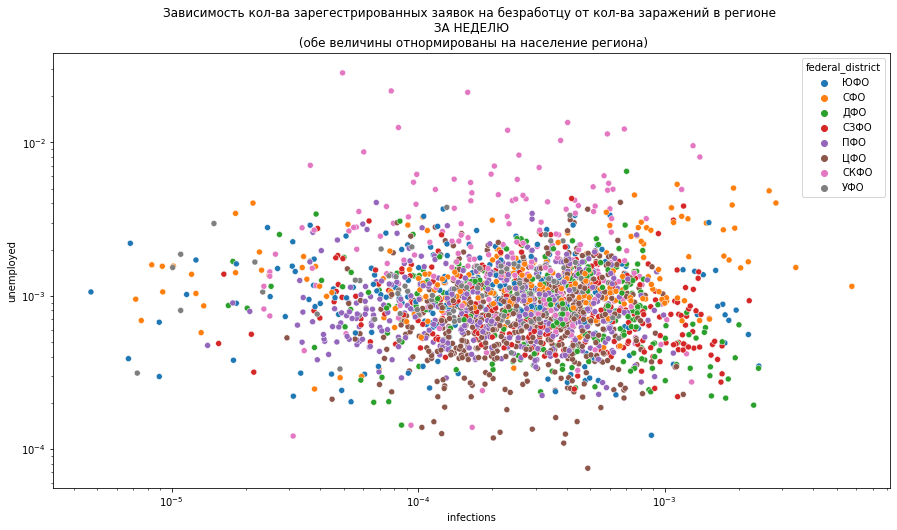

In [285]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="infections", y="unemployed", hue="federal_district")
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА НЕДЕЛЮ \n (обе величины отнормированы на население региона)")
None

посчитаем корелляцию кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе за неделю

In [286]:
np.corrcoef(agg_df[["infections", "unemployed"]].transpose())

array([[1.00000000e+00, 5.55818719e-04],
       [5.55818719e-04, 1.00000000e+00]])

Ярко выраженной зависимости ожидаемо нет, так как согласно механизму заболеваемость *отложенно* влияет на экономику региона

## проверим наличие зависимостей на уровне различных регионов
Оценим суммарное кол-во зарегестрированных случаев
?Будем считать что оно высоко коррелирует с реальной эпидемиологической обстановкой
Посчитаем на суммарное кол-ве поданных заявок на пособие по безработице
Посмотрим на корелляцию данных величин

In [287]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0]))

In [288]:
agg_df = agg_df.groupby("region").agg(sum_infections=("infections", "sum"),
                             sum_unemployed=("unemployed", "sum"),
                             population=("population", "mean"),
                             federal_district=("federal_district", lambda x: x.iloc[0]))


In [289]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["sum_infections"] = agg_df["sum_infections"] / agg_df["population"]
agg_df["sum_unemployed"] = agg_df["sum_unemployed"] / agg_df["population"]

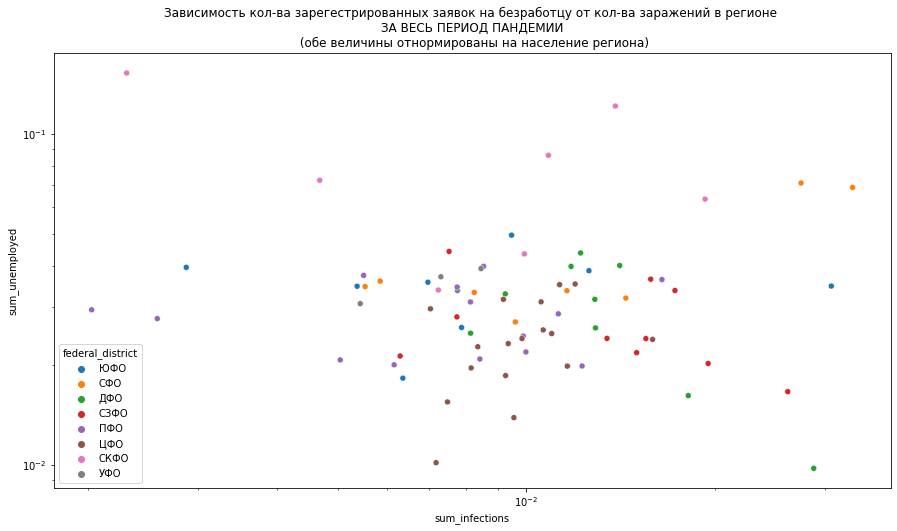

In [290]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="sum_infections", y="sum_unemployed", hue="federal_district")
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА ВЕСЬ ПЕРИОД ПАНДЕМИИ \n (обе величины отнормированы на население региона)")
None

In [291]:
np.corrcoef(agg_df[["sum_infections", "sum_unemployed"]].transpose())

array([[1.        , 0.01920574],
       [0.01920574, 1.        ]])

Значимого уровня корреляции между исследуемыми показателями не найдено

## регрессионный анализ
Чтобы проверить наличие взаимосвязи между количеством заявок на пособие по безработице и регистрируемым количеством заболеваний воспользуемся оценкой модели со случайными эффектами

предпосылки к использованию модели со случаынйми эффектами - ?
какие тесты надо дополнительно провести?

In [292]:
# !pip install linearmodels

In [293]:
from linearmodels.panel import PanelOLS, RandomEffects

In [294]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075


In [357]:
df.columns.tolist()[-10:]

['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

In [295]:
df["yandex_continuous"] = df.yandex_continuous.fillna(df.yandex_continuous.mean())

In [296]:
# from sklearn.preprocessing import OneHotEncoder
#
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(df.federal_district.values.reshape(-1, 1)).toarray()
# df = pd.merge(df, pd.DataFrame(encoded, columns=encoder.get_feature_names_out()).set_index(df.index), left_index=True, right_index=True)

In [400]:
import random

name_extra_features = ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

dict_extra_features = {i: (i, "mean") for i in name_extra_features}

df_panel = df.copy()
df_panel["week"] = pd.to_datetime(df_panel["week"])
df_panel["random"] = [random.randint(0, 100) for i in range(len(df_panel))]
df_panel = df_panel.groupby(["federal_district", "week"]).agg(sum_infections=("infections", "mean"),
                                                    sum_unemployed=("unemployed", "sum"),
                                                    # sum_deaths=("deaths", "mean"),
                                                    # rnd_var=("random", "mean"),
                                                    population=("population", "mean"),
                                                    yandex_metric=("yandex_continuous", "mean"),
                                                    rt_coef=("Rt", "mean"),
                                                    # depo_mean_19=("depo_mean_19", "mean"),
                                                              **dict_extra_features
                                                    # dfo=("x0_ДФО", "mean"),
                                                    # pfo=("x0_ПФО", "mean"),
                                                    # szfo=("x0_СЗФО", "mean"),
                                                    # skfo=("x0_СКФО", "mean"),
                                                    # sfo=("x0_СФО", "mean"),
                                                    # cfo=("x0_ЦФО", "mean"),
                                                    # ufo=("x0_УФО", "mean"),
                                                    )

In [401]:
df_panel["sum_infections"] /= df_panel["population"]
df_panel["sum_unemployed"] /= df_panel["population"]

In [402]:
df_panel.to_csv("dataset_agregared.csv")

In [403]:
df_panel

sum_infections  sum_unemployed    population  \
federal_district week                                                       
ДФО              2020-04-06        0.000077        0.003106  9.556986e+05   
                 2020-04-13        0.000606        0.018878  9.138464e+05   
                 2020-04-20        0.000062        0.017993  9.134329e+05   
                 2020-04-27        0.000112        0.011442  9.626439e+05   
                 2020-05-04        0.000056        0.007045  9.484666e+05   
...                                     ...             ...           ...   
ЮФО              2020-09-28        0.000260        0.005152  2.282553e+06   
                 2020-10-05        0.000102        0.004709  2.293120e+06   
                 2020-10-12        0.000320        0.004455  2.277879e+06   
                 2020-10-19        0.000398        0.004154  2.301150e+06   
                 2020-10-26        0.000456        0.002394  2.425875e+06   

                             yandex_metric   rt_coef  depo_mean_19  \
federal_district week                                                
ДФО              2020-04-06       2.154477  0.964085    142.092243   
                 2020-04-13       2.059472  2.548739    147.492316   
                 2020-04-20       2.056513  2.912596    149.218522   
                 2020-04-27       2.037162  1.227306    145.518890   
                 2020-05-04       2.035755  1.214661    143.054980   
...                                    ...       ...           ...   
ЮФО              2020-09-28       1.412971  1.037999     89.063009   
                 2020-10-05       1.893202  1.281269     89.536477   
                 2020-10-12       1.893202  1.038651     89.257004   
                 2020-10-19       1.893202  1.102579     89.446340   
                 2020-10-26       1.893202  1.099206     91.028869   

                             depo_salary_19  growth_depo_19  \
federal_district week                                         
ДФО              2020-04-06        3.869346       32.848510   
                 2020-04-13        3.941613       32.487143   
                 2020-04-20        3.957859       32.423787   
                 2020-04-27        3.919309       32.580115   
                 2020-05-04        3.896417       32.588800   
...                                     ...             ...   
ЮФО              2020-09-28        3.368575       37.269124   
                 2020-10-05        3.397073       37.868160   
                 2020-10-12        3.357757       37.418162   
                 2020-10-19        3.400879       37.544164   
                 2020-10-26        3.460565       36.322523   

                             curr_depo_perc_19  fin_wealth_19  \
federal_district week                                           
ДФО              2020-04-06           8.056210      42.920526   
                 2020-04-13           7.958746      43.938836   
                 2020-04-20           7.980272      44.441576   
                 2020-04-27           8.126645      43.677898   
                 2020-05-04           8.001910      43.084377   
...                                        ...            ...   
ЮФО              2020-09-28           8.156177      33.971963   
                 2020-10-05           8.225178      33.784068   
                 2020-10-12           8.117732      34.318406   
                 2020-10-19           8.212994      33.853094   
                 2020-10-26           8.449868      34.035635   

                             soceco_wealth_19  depo_mean_20  depo_salary_20  \
federal_district week                                                         
ДФО              2020-04-06         32.278602    149.294177        3.937772   
                 2020-04-13         31.626648    154.857223        4.005657   
                 2020-04-20         31.744989    156.646115        4.021767   
                 2020-04-27         32.502877    152.76

### проверим коллениарность данных

<AxesSubplot:>

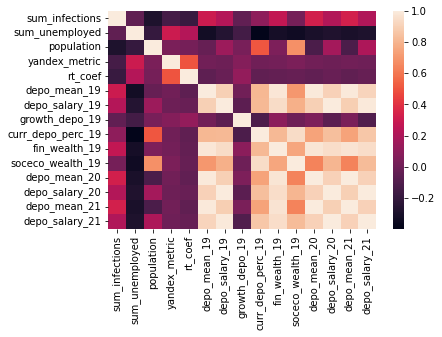

In [404]:
sns.heatmap(df_panel.corr())

In [405]:
df_panel.corr()

,sum_infections,sum_unemployed,population,yandex_metric,rt_coef,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
sum_infections,1.000000,-0.053044,-0.283244,-0.140891,-0.188296,0.301609,0.223868,-0.046032,0.102560,0.270879,0.022198,0.327083,0.217713,0.329463,0.213651
sum_unemployed,-0.053044,1.000000,-0.197150,0.304113,0.224296,-0.331153,-0.264820,-0.149221,-0.397041,-0.315375,-0.342398,-0.301504,-0.278248,-0.301329,-0.284678
population,-0.283244,-0.197150,1.000000,0.034980,0.019277,-0.027843,0.146496,0.031323,0.506022,0.046792,0.683417,-0.121151,0.170844,-0.119258,0.198217
yandex_metric,-0.140891,0.304113,0.034980,1.000000,0.500423,0.008608,-0.005867,0.070084,0.005916,0.013683,0.039980,0.007604,-0.004193,0.011143,-0.000213
rt_coef,-0.188296,0.224296,0.019277,0.500423,1.000000,-0.057232,-0.021160,0.121002,-0.053089,-0.041501,-0.026017,-0.047562,-0.021849,-0.049804,-0.029856
depo_mean_19,0.301609,-0.331153,-0.027843,0.008608,-0.057232,1.000000,0.897860,0.007497,0.812922,0.978661,0.701586,0.990049,0.905438,0.990502,0.916203
depo_salary_19,0.223868,-0.264820,0.146496,-0.005867,-0.021160,0.897860,1.000000,-0.063438,0.818177,0.943668,0.787109,0.901645,0.999024,0.895210,0.993569
growth_depo_19,-0.046032,-0.149221,0.031323,0.070084,0.121002,0.007497,-0.063438,1.000000,-0.114532,0.092869,-0.000265,0.049194,-0.065382,0.035742,-0.100778
curr_depo_perc_19,0.102560,-0.397041,0.506022,0.005916,-0.053089,0.812922,0.818177,-0.114532,1.000000,0.817560,0.941514,0.738959,0.841343,0.739708,0.867844
fin_wealth_19,0.270879,-0.315375,0.046792,0.013683,-0.041501,0.978661,0.943668,0.092869,0.817560,1.000000,0.753832,0.976649,0.947460,0.971997,0.948439


In [406]:
df_panel

sum_infections  sum_unemployed    population  \
federal_district week                                                       
ДФО              2020-04-06        0.000077        0.003106  9.556986e+05   
                 2020-04-13        0.000606        0.018878  9.138464e+05   
                 2020-04-20        0.000062        0.017993  9.134329e+05   
                 2020-04-27        0.000112        0.011442  9.626439e+05   
                 2020-05-04        0.000056        0.007045  9.484666e+05   
...                                     ...             ...           ...   
ЮФО              2020-09-28        0.000260        0.005152  2.282553e+06   
                 2020-10-05        0.000102        0.004709  2.293120e+06   
                 2020-10-12        0.000320        0.004455  2.277879e+06   
                 2020-10-19        0.000398        0.004154  2.301150e+06   
                 2020-10-26        0.000456        0.002394  2.425875e+06   

                             yandex_metric   rt_coef  depo_mean_19  \
federal_district week                                                
ДФО              2020-04-06       2.154477  0.964085    142.092243   
                 2020-04-13       2.059472  2.548739    147.492316   
                 2020-04-20       2.056513  2.912596    149.218522   
                 2020-04-27       2.037162  1.227306    145.518890   
                 2020-05-04       2.035755  1.214661    143.054980   
...                                    ...       ...           ...   
ЮФО              2020-09-28       1.412971  1.037999     89.063009   
                 2020-10-05       1.893202  1.281269     89.536477   
                 2020-10-12       1.893202  1.038651     89.257004   
                 2020-10-19       1.893202  1.102579     89.446340   
                 2020-10-26       1.893202  1.099206     91.028869   

                             depo_salary_19  growth_depo_19  \
federal_district week                                         
ДФО              2020-04-06        3.869346       32.848510   
                 2020-04-13        3.941613       32.487143   
                 2020-04-20        3.957859       32.423787   
                 2020-04-27        3.919309       32.580115   
                 2020-05-04        3.896417       32.588800   
...                                     ...             ...   
ЮФО              2020-09-28        3.368575       37.269124   
                 2020-10-05        3.397073       37.868160   
                 2020-10-12        3.357757       37.418162   
                 2020-10-19        3.400879       37.544164   
                 2020-10-26        3.460565       36.322523   

                             curr_depo_perc_19  fin_wealth_19  \
federal_district week                                           
ДФО              2020-04-06           8.056210      42.920526   
                 2020-04-13           7.958746      43.938836   
                 2020-04-20           7.980272      44.441576   
                 2020-04-27           8.126645      43.677898   
                 2020-05-04           8.001910      43.084377   
...                                        ...            ...   
ЮФО              2020-09-28           8.156177      33.971963   
                 2020-10-05           8.225178      33.784068   
                 2020-10-12           8.117732      34.318406   
                 2020-10-19           8.212994      33.853094   
                 2020-10-26           8.449868      34.035635   

                             soceco_wealth_19  depo_mean_20  depo_salary_20  \
federal_district week                                                         
ДФО              2020-04-06         32.278602    149.294177        3.937772   
                 2020-04-13         31.626648    154.857223        4.005657   
                 2020-04-20         31.744989    156.646115        4.021767   
                 2020-04-27         32.502877    152.76

### проверить Коэффициенты Вариации (VIF)

In [407]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - матрица признаков
vif_data = pd.DataFrame()
vif_data["Variable"] = df_panel.columns
vif_data["VIF"] = [variance_inflation_factor(df_panel.values, i) for i in range(df_panel.shape[1])]

In [408]:
vif_data

,Variable,VIF
0,sum_infections,4.319157e+00
1,sum_unemployed,5.446375e+00
2,population,5.487983e+03
3,yandex_metric,4.405383e+01
4,rt_coef,1.292625e+01
5,depo_mean_19,7.930421e+05
6,depo_salary_19,7.412466e+05
7,growth_depo_19,4.332776e+03
8,curr_depo_perc_19,4.980612e+04
9,fin_wealth_19,5.048103e+04


In [409]:
df_panel

sum_infections  sum_unemployed    population  \
federal_district week                                                       
ДФО              2020-04-06        0.000077        0.003106  9.556986e+05   
                 2020-04-13        0.000606        0.018878  9.138464e+05   
                 2020-04-20        0.000062        0.017993  9.134329e+05   
                 2020-04-27        0.000112        0.011442  9.626439e+05   
                 2020-05-04        0.000056        0.007045  9.484666e+05   
...                                     ...             ...           ...   
ЮФО              2020-09-28        0.000260        0.005152  2.282553e+06   
                 2020-10-05        0.000102        0.004709  2.293120e+06   
                 2020-10-12        0.000320        0.004455  2.277879e+06   
                 2020-10-19        0.000398        0.004154  2.301150e+06   
                 2020-10-26        0.000456        0.002394  2.425875e+06   

                             yandex_metric   rt_coef  depo_mean_19  \
federal_district week                                                
ДФО              2020-04-06       2.154477  0.964085    142.092243   
                 2020-04-13       2.059472  2.548739    147.492316   
                 2020-04-20       2.056513  2.912596    149.218522   
                 2020-04-27       2.037162  1.227306    145.518890   
                 2020-05-04       2.035755  1.214661    143.054980   
...                                    ...       ...           ...   
ЮФО              2020-09-28       1.412971  1.037999     89.063009   
                 2020-10-05       1.893202  1.281269     89.536477   
                 2020-10-12       1.893202  1.038651     89.257004   
                 2020-10-19       1.893202  1.102579     89.446340   
                 2020-10-26       1.893202  1.099206     91.028869   

                             depo_salary_19  growth_depo_19  \
federal_district week                                         
ДФО              2020-04-06        3.869346       32.848510   
                 2020-04-13        3.941613       32.487143   
                 2020-04-20        3.957859       32.423787   
                 2020-04-27        3.919309       32.580115   
                 2020-05-04        3.896417       32.588800   
...                                     ...             ...   
ЮФО              2020-09-28        3.368575       37.269124   
                 2020-10-05        3.397073       37.868160   
                 2020-10-12        3.357757       37.418162   
                 2020-10-19        3.400879       37.544164   
                 2020-10-26        3.460565       36.322523   

                             curr_depo_perc_19  fin_wealth_19  \
federal_district week                                           
ДФО              2020-04-06           8.056210      42.920526   
                 2020-04-13           7.958746      43.938836   
                 2020-04-20           7.980272      44.441576   
                 2020-04-27           8.126645      43.677898   
                 2020-05-04           8.001910      43.084377   
...                                        ...            ...   
ЮФО              2020-09-28           8.156177      33.971963   
                 2020-10-05           8.225178      33.784068   
                 2020-10-12           8.117732      34.318406   
                 2020-10-19           8.212994      33.853094   
                 2020-10-26           8.449868      34.035635   

                             soceco_wealth_19  depo_mean_20  depo_salary_20  \
federal_district week                                                         
ДФО              2020-04-06         32.278602    149.294177        3.937772   
                 2020-04-13         31.626648    154.857223        4.005657   
                 2020-04-20         31.744989    156.646115        4.021767   
                 2020-04-27         32.502877    152.76

In [410]:
tmp= df_panel.reset_index()
tmp['week'] = pd.Categorical(tmp['week'])
tmp['region'] = pd.Categorical(tmp['federal_district'])

In [411]:
columns_for_x = ['sum_infections', "yandex_metric", "rt_coef"] + name_extra_features
name_y = "sum_unemployed"

formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(federal_district) + C(week)'

In [415]:
import statsmodels.api as sm

model = sm.OLS.from_formula(formula, data=tmp)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [416]:
tmp

,federal_district,week,sum_infections,sum_unemployed,population,yandex_metric,rt_coef,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21,region
0,ДФО,2020-04-06,0.000077,0.003106,9.556986e+05,2.154477,0.964085,142.092243,3.869346,32.848510,8.056210,42.920526,32.278602,149.294177,3.937772,172.952384,4.207906,ДФО
1,ДФО,2020-04-13,0.000606,0.018878,9.138464e+05,2.059472,2.548739,147.492316,3.941613,32.487143,7.958746,43.938836,31.626648,154.857223,4.005657,179.169216,4.273413,ДФО
2,ДФО,2020-04-20,0.000062,0.017993,9.134329e+05,2.056513,2.912596,149.218522,3.957859,32.423787,7.980272,44.441576,31.744989,156.646115,4.021767,181.174093,4.289578,ДФО
3,ДФО,2020-04-27,0.000112,0.011442,9.626439e+05,2.037162,1.227306,145.518890,3.919309,32.580115,8.126645,43.677898,32.502877,152.768760,3.986659,176.684370,4.258315,ДФО
4,ДФО,2020-05-04,0.000056,0.007045,9.484666e+05,2.035755,1.214661,143.054980,3.896417,32.588800,8.001910,43.084377,32.091874,150.281331,3.964747,173.985128,4.235279,ДФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,ЮФО,2020-09-28,0.000260,0.005152,2.282553e+06,1.412971,1.037999,89.063009,3.368575,37.269124,8.156177,33.971963,39.359904,94.497938,3.419183,107.267600,3.563544,ЮФО
236,ЮФО,2020-10-05,0.000102,0.004709,2.293120e+06,1.893202,1.281269,89.536477,3.397073,37.868160,8.225178,33.784068,39.434650,95.195930,3.457017,107.815015,3.599403,ЮФО
237,ЮФО,2020-10-12,0.000320,0.004455,2.277879e+06,1.893202,1.038651,89.257004,3.357757,37.418162,8.117732,34.318406,39.541619,94.760889,3.411854,107.381887,3.550525,ЮФО
238,ЮФО,2020-10-19,0.000398,0.004154,2.301150e+06,1.893202,1.102579,89.446340,3.400879,37.544164,8.212994,33.853094,39.525191,94.945216,3.453102,107.756580,3.599775,ЮФО


In [417]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         sum_unemployed   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     25.33
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.03e-61
Time:                        23:40:15   Log-Likelihood:                 988.52
No. Observations:                 240   AIC:                            -1877.
Df Residuals:                     190   BIC:                            -1703.
Df Model:                          49                                         
Covariance Type:                  HAC                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
panel_data['id'] = pd.Categorical(panel_data['id'])
panel_data['time'] = pd.Categorical(panel_data['time'])

# Оценка модели с фиксированными эффектами
model = sm.PanelOLS.from_formula('y ~ x1 + x2 + EntityEffects + TimeEffects', data=panel_data)
results = model.fit()

In [330]:
results

NameError: name 'results' is not defined

In [358]:

dependent_variable = 'sum_unemployed'


explanatory_variables = ['sum_infections', "yandex_metric", "rt_coef"] + ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

individual_variable = 'region'
time_variable = 'week'

# Модель с фиксированными эффектами
model_fe = PanelOLS.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects', df_panel)


# Оцените обе модели
results_fe = model_fe.fit(cov_type='kernel', kernel='bartlett', check_rank=False)

# Модель со случайными эффектами
# model_re = RandomEffects.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)}', df_panel)
# results_re = model_re.fit()



FactorEvaluationError: Unable to evaluate factor `growth_depo_19`. [NameError: `growth_depo_19` is not present in the dataset or evaluation context.]

In [309]:
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         sum_unemployed   R-squared:                        0.0177
Estimator:                   PanelOLS   R-squared (Between):              0.5719
No. Observations:                2310   R-squared (Within):               0.0177
Date:                Mon, Dec 11 2023   R-squared (Overall):              0.3533
Time:                        22:18:38   Log-likelihood                 1.248e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      13.384
Entities:                          77   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                  F(3,2230)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             1.8146
                            

In [255]:
from statsmodels.datasets import grunfeld

data = grunfeld.load_pandas().data
data = data.set_index(["firm", "year"])
data.head()

invest   value  capital
firm           year                           
General Motors 1935.0   317.6  3078.5      2.8
               1936.0   391.8  4661.7     52.6
               1937.0   410.6  5387.1    156.9
               1938.0   257.7  2792.2    209.2
               1939.0   330.8  4313.2    203.4

In [39]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula("invest ~ value + capital + EntityEffects", data=data)
print(mod.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7667
Estimator:                   PanelOLS   R-squared (Between):              0.8223
No. Observations:                 220   R-squared (Within):               0.7667
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.8132
Time:                        22:31:09   Log-likelihood                   -1167.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      340.08
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,207)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             340.08
                            

In [30]:
f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects'

'sum_unemployed ~ sum_infections + EntityEffects'